<div align = 'center'><h2>House Prices: Advanced Regression Techniques<h2><div>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install fancyimpute
from fancyimpute import KNN
import numpy as np
from sklearn.impute import SimpleImputer


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


In [0]:
#Loading house price tarning data

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Archives/kaggle_train.csv')
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Archives/kaggle_test.csv')
original_data = data.copy()
original_test_data = test_data.copy()
#https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
saleprice = data['SalePrice']
#data.drop('SalePrice',axis = 1,inplace = True)

<h1> Data Preprocessing </h1>

In [0]:
saleprice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

There is large gap in 75th percentile and max values, shows that there might be outliers.

<h2> Getting important features by correlation with sales price </h2>

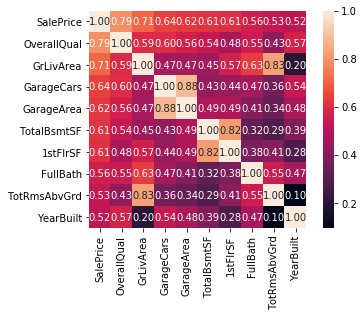

In [0]:
corrmat = data.corr()
top_10_columns = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[top_10_columns].values.T)
sns.heatmap(cm,annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=top_10_columns.values,xticklabels=top_10_columns.values)

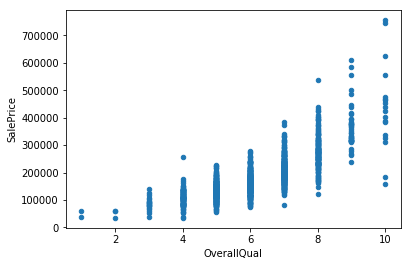

In [0]:
data.plot.scatter('OverallQual','SalePrice')

Positive Co-Relation between SalesPrice and OverallQual

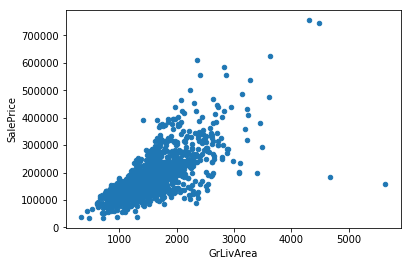

In [0]:
data.plot.scatter('GrLivArea','SalePrice')

Above graph shows that 2 points at right bottom are outliers.

<h3> Removing Outliers </h3>

In [0]:
ind = data[(data.GrLivArea > 4000) & (data.SalePrice < 300000)].index
data = data.drop(ind)
saleprice = saleprice.drop(ind)

<h2>Filling missing Values</h2>

In [0]:
data.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

<h2> Alley,  PoolQC, Fence and MiscFeature have More than 90% of the values are missing. </h2>
 We will fill null value of this columns with NA. As, filling this columns with other strategy dosn't add value to the data.

In [0]:
clms = ['MiscFeature','Fence','PoolQC','Alley']
other_data = pd.DataFrame(data=SimpleImputer(strategy = 'constant',fill_value = 'NA').fit_transform(data[clms]), columns=data[clms].columns, index=data[clms].index)
test_other_data = pd.DataFrame(data=SimpleImputer(strategy = 'constant',fill_value = 'NA').fit_transform(test_data[clms]), columns=test_data[clms].columns, index=test_data[clms].index)

In [0]:
numric_columns = data.select_dtypes(['float64','int64']).columns
cat_columns =data.select_dtypes(['object']).columns
#removing columns with many missing values and target value column
cat_columns = (cat_columns).drop(clms)
numric_columns = numric_columns.drop('SalePrice')

Filling missing Numrical Value using KNN

In [0]:
numric_data = pd.DataFrame(data=KNN(k=3).fit_transform(data[numric_columns]), columns=data[numric_columns].columns, index=data[numric_columns].index)
test_numric_data =  pd.DataFrame(data=KNN(k=3).fit_transform(test_data[numric_columns]), columns=test_data[numric_columns].columns, index=test_data[numric_columns].index)

Imputing row 1/1458 with 0 missing, elapsed time: 0.598
Imputing row 101/1458 with 1 missing, elapsed time: 0.600
Imputing row 201/1458 with 0 missing, elapsed time: 0.601
Imputing row 301/1458 with 0 missing, elapsed time: 0.602
Imputing row 401/1458 with 0 missing, elapsed time: 0.603
Imputing row 501/1458 with 0 missing, elapsed time: 0.604
Imputing row 601/1458 with 0 missing, elapsed time: 0.605
Imputing row 701/1458 with 0 missing, elapsed time: 0.606
Imputing row 801/1458 with 0 missing, elapsed time: 0.607
Imputing row 901/1458 with 0 missing, elapsed time: 0.608
Imputing row 1001/1458 with 0 missing, elapsed time: 0.609
Imputing row 1101/1458 with 0 missing, elapsed time: 0.610
Imputing row 1201/1458 with 0 missing, elapsed time: 0.611
Imputing row 1301/1458 with 0 missing, elapsed time: 0.612
Imputing row 1401/1458 with 0 missing, elapsed time: 0.613
Imputing row 1/1459 with 0 missing, elapsed time: 0.594
Imputing row 101/1459 with 1 missing, elapsed time: 0.595
Imputing row 

Filling missing value for categorical data using mode

In [0]:
catog_data=pd.DataFrame(data=SimpleImputer(strategy = 'most_frequent').fit_transform(data[cat_columns]), columns=data[cat_columns].columns, index=data[cat_columns].index)
test_catog_data=pd.DataFrame(data=SimpleImputer(strategy = 'most_frequent').fit_transform(test_data[cat_columns]), columns=test_data[cat_columns].columns, index=test_data[cat_columns].index)

In [0]:
data = pd.concat([numric_data,catog_data,other_data],axis = 1)
test_data = pd.concat([test_numric_data,test_catog_data,test_other_data],axis = 1)

In [0]:
print(data.shape)
print(test_data.shape)

(1458, 80)
(1459, 80)


<h2>Distribution of salesprice</h2>

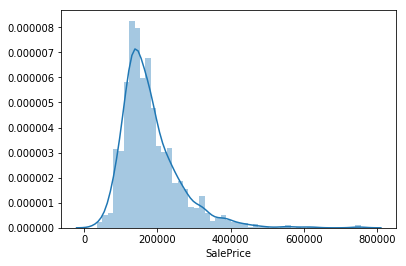

In [0]:
sns.distplot(saleprice, hist=True, kde=True)

<h2> Salesprice have normlised distribution with right kurtoisis.</h2>
Standrdizing numrical variable to have normal distibution might give better accuracy in some algorithm like Gaussian Naive Bayes.

<h3> Standadizing Numrical Features to have Normlise distribution</h3>

In [0]:
#https://www.kaggle.com/apapiu/regularized-linear-models
#log transform the target:
from scipy.stats import skew
saleprice = np.log1p(saleprice)

#log transform skewed numeric features:

skewed_feats = data[numric_columns].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

data[skewed_feats] = np.log1p(data[skewed_feats])
test_data[skewed_feats] = np.log1p(test_data[skewed_feats])

In [0]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
data[numric_columns] = stdsc.fit_transform(data[numric_columns])
test_data[numric_columns] = stdsc.transform(test_data[numric_columns])

<h3> OneHot Encoding Catogorical Features </h3>

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
for column in cat_columns:
  cv = CountVectorizer(token_pattern=r"\b\w+\b")
  data = pd.concat([data,pd.DataFrame(data = cv.fit_transform(data[column]).toarray(),index = data.index)],axis = 1)
  data.drop(column,axis = 1,inplace = True)
  
  test_data = pd.concat([test_data,pd.DataFrame(data = cv.transform(test_data[column]).toarray(),index = test_data.index)],axis = 1)
  test_data.drop(column,axis = 1,inplace = True)
#---------------------------------------------------------------------------------

for column in clms:
  cv = CountVectorizer(token_pattern=r"\b\w+\b")
  data = pd.concat([data,pd.DataFrame(data = cv.fit_transform(data[column]).toarray(),index = data.index)],axis = 1)
  data.drop(column,axis = 1,inplace = True)
  
  test_data = pd.concat([test_data,pd.DataFrame(data = cv.transform(test_data[column]).toarray(),index = test_data.index)],axis = 1)
  test_data.drop(column,axis = 1,inplace = True)

<h2> Feature Engineering </h2>

In [0]:
#Getting polynomials of top 10 features
feature_engineering_data = data.copy()
top_10_columns = top_10_columns.drop('SalePrice')
for column in top_10_columns:
  feature_engineering_data[column.join('cos')] = np.cos(data[column])

In [0]:
#for test data
feature_engineering_test_data = test_data.copy()
for column in top_10_columns:
  feature_engineering_test_data[column.join('cos')] = np.cos(test_data[column])

<h3> </h3>

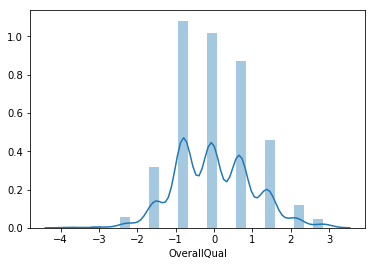

In [0]:
sns.distplot(data['OverallQual'])

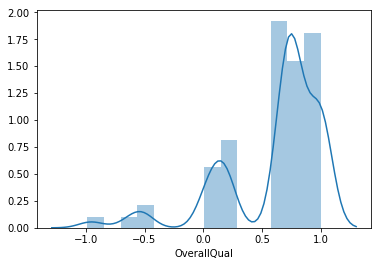

In [0]:
sns.distplot(np.cos(data['OverallQual']))

<b> Feature engineered data is concentrated within -1 to 1 without symmetry.
 <br>Converting data with cos function gives better result then other polynomial features.
<br> Taking cos function of numrical feature supress effect of outliers in numrical data, and hence it is giving better result then normal data </b>

<h3> Spilliting data into train and test</h3>

In [0]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(data, saleprice,test_size=0.2)
fe_x_train, fe_x_test, fe_y_train, fe_y_test = train_test_split(feature_engineering_data, saleprice,test_size=0.2)

<h2> Training Models </h2>

<h3>Lasso</h3>

In [0]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error

lasso = LassoCV(
            cv=10,
            max_iter=50000,
            n_jobs=-1,
            random_state=42
      )

lasso = lasso.fit(x_train, y_train)


y_pred_cv = lasso.predict(x_train)
y_pred_test = lasso.predict(x_test)

print('Best Alpha : ' + str(lasso.alpha_))

print('Train R^2 : ' + str(r2_score(y_train, y_pred_cv)))
print('Test R^2 : ' + str(r2_score(y_test, y_pred_test)))

print('Train MSE : ' + str(mean_squared_error(y_train, y_pred_cv)))
print('Test MSE : ' + str(mean_squared_error(y_test, y_pred_test)))

Best Alpha : 0.000387579046010464
Train R^2 : 0.9424698134967195
Test R^2 : 0.9312895328969698
Train MSE : 0.00955778754003222
Test MSE : 0.009189279383032179


In [0]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error

print("-"*20,' For FE Data',"-"*20)

lasso_fe = LassoCV(
            cv=10,
            max_iter=50000,
            n_jobs=-1,
            random_state=42
      )

lasso_fe = lasso_fe.fit(fe_x_train,fe_y_train)

y_pred_cv = lasso_fe.predict(fe_x_train)
y_pred_test = lasso_fe.predict(fe_x_test)

print('Best Alpha : ' + str(lasso_fe.alpha_))

print('Train R^2 : ' + str(r2_score(fe_y_train, y_pred_cv)))
print('Test R^2 : ' + str(r2_score(fe_y_test, y_pred_test)))

print('Train MSE : ' + str(mean_squared_error(fe_y_train, y_pred_cv)))
print('Test MSE : ' + str(mean_squared_error(fe_y_test, y_pred_test)))


--------------------  For FE Data --------------------
Best Alpha : 0.000585242182046492
Train R^2 : 0.941692985647157
Test R^2 : 0.9230825222835246
Train MSE : 0.009384613207853365
Test MSE : 0.011881334728975332


In [0]:
np.nonzero(lasso.coef_)[0].shape

(134,)

<h3> Random Forest </h3>

<b> Taking only important data with co-efficient of lasso method.

In [0]:
data = data.iloc[:,np.nonzero(lasso.coef_)[0]]
feature_engineering_data = feature_engineering_data.iloc[:,np.nonzero(lasso_fe.coef_)[0]]
feature_engineering_test_data_ = feature_engineering_test_data.iloc[:,np.nonzero(lasso_fe.coef_)[0]]

x_train, x_test, y_train, y_test = train_test_split(data, saleprice,test_size=0.2)
fe_x_train, fe_x_test, fe_y_train, fe_y_test = train_test_split(feature_engineering_data, saleprice,test_size=0.2)

In [0]:
feature_engineering_test_data_ = feature_engineering_test_data.iloc[:,np.nonzero(lasso_fe.coef_)[0]]

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters = {
                'n_estimators': [50,100,150,200],
                'oob_score': [True],
                'criterion': ['mse'],
                'max_depth': [3,6,9, 12, 15],
                'n_jobs': [-1],
                'random_state': [42]

             }

RFG = RandomForestRegressor()

rfc = GridSearchCV(RFG, parameters, cv=10, scoring='r2')
rfc = rfc.fit(x_train, y_train)

print('Best Score : ' + str(rfc.best_score_))
print('Train R^2 : ' + str(r2_score(y_train, y_pred_cv)))
print('Test R^2 : ' + str(r2_score(y_test, y_pred_test)))

print('Train MSE : ' + str(mean_squared_error(y_train, y_pred_cv)))
print('Test MSE : ' + str(mean_squared_error(y_test, y_pred_test)))



Best Score : 0.8684699199695298
Train R^2 : -1.074098216340993
Test R^2 : -0.9428752738643089
Train MSE : 0.3368279534565931
Test MSE : 0.2882962959042084


In [0]:
#---------------------------------- For FE data -------------------------------
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters = {
                'n_estimators': [50,100,150,200],
                'oob_score': [True],
                'criterion': ['mse'],
                'max_depth': [3,6,9, 12, 15],
                'n_jobs': [-1],
                'random_state': [42]

             }

RFG = RandomForestRegressor()


print("-"*20,' For FE Data',"-"*20)
rfc_fe = GridSearchCV(RFG, parameters, cv=10, scoring='r2')
rfc_fe = rfc_fe.fit(fe_x_train, fe_y_train)

y_pred_cv = rfc_fe.predict(fe_x_train)
y_pred_test = rfc_fe.predict(fe_x_test)

print('Best Score : ' + str(rfc_fe.best_score_))

print('Train R^2 : ' + str(r2_score(fe_y_train, y_pred_cv)))
print('Test R^2 : ' + str(r2_score(fe_y_test, y_pred_test)))

print('Train MSE : ' + str(mean_squared_error(fe_y_train, y_pred_cv)))
print('Test MSE : ' + str(mean_squared_error(fe_y_test, y_pred_test)))

--------------------  For FE Data --------------------
Best Score : 0.8779569796658526
Train R^2 : 0.9829308717166015
Test R^2 : 0.8752949774477806
Train MSE : 0.002813588495127122
Test MSE : 0.017323642491274


In [0]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
parameters = {
                'n_estimators': [50,70,100,150,200,500], # default 100
                'max_depth': [3, 6, 9, 12],
             }

model = GradientBoostingRegressor()

'''xgb = GridSearchCV(model, parameters, cv=10)
xgb = xgb.fit(x_train, y_train)

print('Best Score : ' + str(xgb.best_score_))
print('Train R^2 : ' + str(r2_score(y_train, y_pred_cv)))
print('Test R^2 : ' + str(r2_score(y_test, y_pred_test)))

print('Train MSE : ' + str(mean_squared_error(y_train, y_pred_cv)))
print('Test MSE : ' + str(mean_squared_error(y_test, y_pred_test)))
'''
#---------------------------------- For FE data -------------------------------

print("-"*20,' For FE Data',"-"*20)
xgb_fe = GridSearchCV(model, parameters, cv=10)
xgb_fe = xgb_fe.fit(fe_x_train, fe_y_train)

y_pred_cv = xgb_fe.predict(fe_x_train)
y_pred_test = xgb_fe.predict(fe_x_test)


print('Best Score : ' + str(xgb_fe.best_score_))

print('Train R^2 : ' + str(r2_score(fe_y_train, y_pred_cv)))
print('Test R^2 : ' + str(r2_score(fe_y_test, y_pred_test)))

print('Train MSE : ' + str(mean_squared_error(fe_y_train, y_pred_cv)))
print('Test MSE : ' + str(mean_squared_error(fe_y_test, y_pred_test)))

--------------------  For FE Data --------------------
Best Score : 0.9026734680490477
Train R^2 : 0.9928934513512983
Test R^2 : 0.9232709251682383
Train MSE : 0.0011509810135324017
Test MSE : 0.011536935798430367


<h3> Stacking </h3>

In [0]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression

model = StackingRegressor( regressors=[lasso_fe, xgb_fe, rfc_fe], meta_regressor=LinearRegression(n_jobs = -1))

model.fit(fe_x_train, fe_y_train)

y_pred_cv = model.predict(fe_x_train)
y_pred_test = model.predict(fe_x_test)


print('Train R^2 : ' + str(r2_score(fe_y_train, y_pred_cv)))
print('Test R^2 : ' + str(r2_score(fe_y_test, y_pred_test)))

print('Train MSE : ' + str(mean_squared_error(fe_y_train, y_pred_cv)))
print('Test MSE : ' + str(mean_squared_error(fe_y_test, y_pred_test)))

Train R^2 : 0.986447983296672
Test R^2 : 0.8479703112014891
Train MSE : 0.002233845668576968
Test MSE : 0.021119502028895426


In [0]:
lasso_y_pred = lasso.predict(test_data)
#stacking_y_pred = model.predict(feature_engineering_test_data_)
xgb_y_pred = xgb_fe.predict(feature_engineering_test_data_)
#rfc_y_pred = rfc_fe.predict(feature_engineering_test_data_)

y_pred = (1.1*xgb_y_pred)

# Create empty submission dataframe
sub = pd.DataFrame()

# Insert ID and Predictions into dataframe
sub['Id'] = original_test_data['Id']
sub['SalePrice'] = np.expm1(y_pred)

# Output submission file
sub.to_csv('/content/drive/My Drive/Colab Notebooks/Archives/submission.csv',index=False)

<b>XGBoost have the lowset MSE</b>